In [1]:
#__autho__:CH
#__date__:Apr25
import pandas as pd
import numpy as np
import os
import seaborn
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import geojson
import fiona
%pylab inline
cwd = os.getcwd()

output_path = os.path.join(os.path.dirname(cwd), 'output')
data_path = os.path.join(os.path.dirname(cwd), 'data')

Populating the interactive namespace from numpy and matplotlib


In [2]:
data2 = np.loadtxt(output_path+'/reduce.txt', str)
data2 = data2[data2 != '''(NR10)"'),''']
data1 = pd.DataFrame(data2.reshape((data2.shape[0]/3 ,3)), columns=['year', 'zipcode', 'count'])
data1.head()

,year,zipcode,count
0,"[((2016,","u'10028'),","2027),"
1,"((2010,","u'11204'),","965),"
2,"((2015,","u'10030'),","2899),"
3,"((2015,","u'11366'),","1740),"
4,"((2015,","u'10019'),","3434),"


In [3]:
# clean data format
data1.iloc[0,0] = data1.iloc[0,0][1:]
data1.iloc[-1,-1] = data1.iloc[-1,-1][:-1]

year_list = data1.apply(lambda x: x[0][2:-1], axis = 1)
zipcode_list = data1.apply(lambda x: x[1][2:-3], axis = 1)
counts_list = data1.apply(lambda x: int(x[2][:-2]), axis = 1)
                    

In [4]:
data_ = pd.DataFrame({'year': year_list, 'zipcode':zipcode_list, 'counts': counts_list})

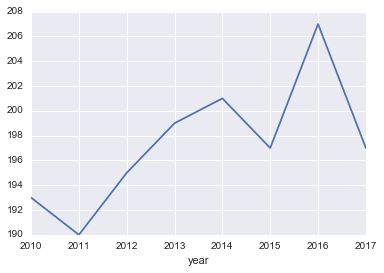

In [5]:
# by year:
by_year = data_.groupby('year', group_keys = False).size()
by_year.plot()

In [6]:
by_zip = data_.groupby('zipcode', group_keys = False, as_index = False).sum()

In [7]:
# load in zipcode boundaries shapefile
zipcode_bdr = gpd.read_file(data_path+'/ZIP_CODE_040114/ZIP_CODE_040114.shp')

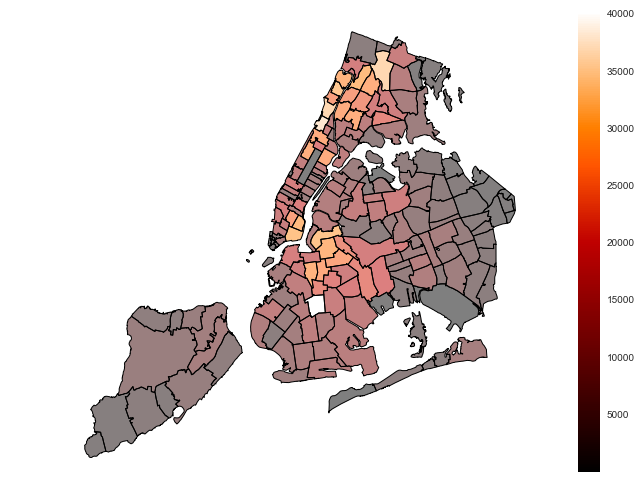

In [8]:
# merge counts by zipcode and shapefile
zipcode_counts = pd.merge(zipcode_bdr[['ZIPCODE', 'geometry']], by_zip, left_on='ZIPCODE', right_on='zipcode')
# mapping
vmin = zipcode_counts.counts.min()
vmax = zipcode_counts.counts.max()

ax = zipcode_counts.plot(column = 'counts', cmap = 'gist_heat');
ax.axis('off')
# plot colorbar
fig2 = ax.get_figure()
fig2.set_size_inches(10, 8)
cax = fig2.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='gist_heat', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable. Urgh...
sm._A = []
fig2.colorbar(sm, cax=cax)
